# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [16]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sid
analyzer = SentimentIntensityAnalyzer()

from newsapi.newsapi_client import NewsApiClient
import alpaca_trade_api as tradeapi
from datetime import datetime, timedelta

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Joe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable

# Load .env enviroment variables
load_dotenv()

# Set News API Key
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
past_date = pd.Timestamp(datetime.now()- timedelta(2), tz="America/New_York").isoformat()

In [241]:
# Create a newsapi client

# get most relevant 20 headlines per day 
def retrieve_articles(keyword):
    all_headlines = []
    all_dates = []    
    date = datetime.strptime(current_date[:10], "%Y-%m-%d")
    end_date = datetime.strptime(past_date[:10], "%Y-%m-%d")
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    while date > end_date:
        print(f"retrieving news from: {date}")
        articles = newsapi.get_everything(
            q=keyword,
            from_param=str(date)[:30],
            to=str(date)[:30],
            language="en",
            sort_by="relevancy",
            page=1,
            page_size=100
            )
        
        date = date - timedelta(days=1)
        
    return articles

In [251]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_news = retrieve_articles("Bitcoin")


Fetching news about 'Bitcoin'
******************************
retrieving news from: 2021-09-24 00:00:00
retrieving news from: 2021-09-23 00:00:00


In [243]:
btc_news["articles"][1]["content"]

'Posted \r\nTwitter will now allow people to tip their favorite content creators with bitcoin and it will test new ways to help users have a safer experience on the social media app, the company said on… [+44 chars]'

In [242]:
# Fetch the Ethereum news articles
eth_news = retrieve_articles("Ethereum")

Fetching news about 'Ethereum'
******************************
retrieving news from: 2021-09-24 00:00:00
retrieving news from: 2021-09-23 00:00:00


In [244]:
eth_news["articles"][1]["content"]

'Paolo Ardoino was on the front lines of one of the largest cryptocurrency heists of all time. He was flooded with calls and messages in August alerting him to a breach at Poly Network, a platform whe… [+2585 chars]'

In [245]:

def get_articles(articles) :

    article_body = []

    for i in range(0, len(articles["articles"])) :
        # If we wanted title we would use the following but we will use Content in this case
        #headlines.append(articles["articles"][i]["title"])
        article_body.append(articles["articles"][i]["content"])     

    return article_body


In [140]:
# def articles_sentiment_summarizer(articles):
#     # get the sentiment for every article then store it in a list
#     article_sentiment_score = []

#     for article in articles:
#         try:
#             article_sentiment_score.append(analyzer.polarity_scores(article))
#         except Exception as e:
#             print(e)
        
#     return article_sentiment_score

In [246]:
# Create the Bitcoin sentiment scores DataFrame
def articles_sentiment_summarizer(articles):
    # get the sentiment for every article then store it in a list
    article_sentiment_row = []
    
    for article in articles:
        try:

            article_sentiment_score= analyzer.polarity_scores(article)
            compound_score = article_sentiment_score["compound"]
            neg_score = article_sentiment_score["neg"]
            neu_score = article_sentiment_score["neu"]
            pos_score = article_sentiment_score["pos"]
            article_sentiment_row.append({"Compound": compound_score,
                                            "Negative": neg_score,
                                            "Neutral": neu_score ,
                                            "Positive": pos_score,
                                            "Text": article
                                         })

            
        except Exception as e:
            print(e)
            
    return article_sentiment_row



In [252]:
# Create A BTC Dataframe of the sentiment results
btc_news_articles = get_articles(btc_news)
btc_sentiment = articles_sentiment_summarizer(btc_news_articles)

# Create a DataFrame of the results
df_btc_sentiment = pd.DataFrame(btc_sentiment)
df_btc_sentiment.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.000,1.000,0.000,Four months after Twitter first introduced in-...
1,0.8555,0.000,0.760,0.240,Posted \r\nTwitter will now allow people to ti...
2,0.3804,0.000,0.933,0.067,Twitter will soon make Spaces even more promin...
3,-0.0418,0.086,0.835,0.079,The Fine Print: The following comments are own...
4,0.2263,0.000,0.940,0.060,The Twitter app is seen on a smartphone in thi...


In [253]:
df_btc_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.220863,0.026330,0.894430,0.079250
std,0.384585,0.051624,0.086137,0.074696
min,-0.900100,0.000000,0.624000,0.000000
25%,0.000000,0.000000,0.843250,0.000000
50%,0.300800,0.000000,0.916000,0.070000
75%,0.475725,0.038750,0.948000,0.117500
max,0.932500,0.261000,1.000000,0.366000


In [249]:
# Create the Ethereum sentiment scores DataFrame
# Fetch the Etherium news articles
eth_news_articles = get_articles(eth_news)


# Calculate the Etherium Sentiment
eth_sentiment = articles_sentiment_summarizer(eth_news_articles)

# Create a DataFrame of the results
df_eth_sentiment = pd.DataFrame(eth_sentiment)
df_eth_sentiment.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.0516,0.128,0.778,0.094,crypto coins circle\r\nNurphoto\r\nThe smaller...
1,0.0000,0.000,1.000,0.000,Paolo Ardoino was on the front lines of one of...
2,0.8402,0.000,0.714,0.286,What happened\r\nPopular cryptocurrency Dogeco...
3,0.7269,0.000,0.803,0.197,"Starting next month, select users will begin t..."
4,0.0000,0.000,1.000,0.000,The personality behind the NFT Twitter account...


In [250]:
df_eth_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,99.000000,99.000000,99.000000,99.000000
mean,0.214654,0.026374,0.896949,0.076707
std,0.372819,0.059891,0.086846,0.070420
min,-0.904200,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.836500,0.000000
50%,0.202300,0.000000,0.912000,0.075000
75%,0.526700,0.000000,0.985500,0.129000
max,0.840200,0.328000,1.000000,0.286000


# Describe the Bitcoin Sentiment

Looking at the Bitcoin Sentiment mean of 100 articles Bitcoin 89.4% of the artles are Neutral 7.9% are positive and 2.6% are negative. 
However overall the Compound result tells use that the artles are 22% on the positive scale

	Compound	Negative	Neutral	Positive
count	100.000000	100.000000	100.000000	100.000000
mean	0.220863	0.026330	0.894430	0.079250

In [9]:
# Describe the Ethereum Sentiment

Etherium is almost identical to Bitcoin in sentiment. Looking at the Ethereum Sentiment mean of 99 Ethereum articles 89.6% of the artles are Neutral 7.8% are positive and 2.6% are negative. 
However overall the Compound result tells use that the artles are 21.4% on the positive scale

	Compound	Negative	Neutral	Positive
count	99.000000	99.000000	99.000000	99.000000
mean	0.214654	0.026374	0.896949	0.076707


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [255]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [268]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')


# Expand the default stopwords list if necessary

sw.append('badwordz')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [269]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
   
    # Create a tokenized list of the words
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # and  Remove the stop words # I use "not in sw]"
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [77]:
# Create a new tokens column for Bitcoin
btc_tokens = tokenizer(btc_news_articles[1])
btc_tokens

['posted',
 'twitter',
 'allow',
 'people',
 'tip',
 'favorite',
 'content',
 'creator',
 'bitcoin',
 'test',
 'new',
 'way',
 'help',
 'user',
 'safer',
 'experience',
 'social',
 'medium',
 'app',
 'company',
 'said',
 'char']

In [272]:
df_btc_sentiment.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.000,1.000,0.000,Four months after Twitter first introduced in-...
1,0.8555,0.000,0.760,0.240,Posted \r\nTwitter will now allow people to ti...
2,0.3804,0.000,0.933,0.067,Twitter will soon make Spaces even more promin...
3,-0.0418,0.086,0.835,0.079,The Fine Print: The following comments are own...
4,0.2263,0.000,0.940,0.060,The Twitter app is seen on a smartphone in thi...


In [289]:
# Create a new tokens column for Bitcoin
tokens =[]
for i in range(len(df_btc_sentiment)) :
    article_tokens = tokenizer(df_btc_sentiment["Text"][i])
    tokens.append(article_tokens)

df_btc_sentiment["tokens"] = tokens     
df_btc_sentiment.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,0.0000,0.000,1.000,0.000,Four months after Twitter first introduced in-...,"[four, month, twitter, first, introduced, inap..."
1,0.8555,0.000,0.760,0.240,Posted \r\nTwitter will now allow people to ti...,"[posted, twitter, allow, people, tip, favorite..."
2,0.3804,0.000,0.933,0.067,Twitter will soon make Spaces even more promin...,"[twitter, soon, make, spaces, even, prominent,..."
3,-0.0418,0.086,0.835,0.079,The Fine Print: The following comments are own...,"[fine, print, following, comment, owned, whoev..."
4,0.2263,0.000,0.940,0.060,The Twitter app is seen on a smartphone in thi...,"[twitter, app, seen, smartphone, illustration,..."


In [288]:
# Create a new tokens column for Ethereum

tokens =[]
for i in range(len(df_eth_sentiment)) :
    article_tokens = tokenizer(df_eth_sentiment["Text"][i])
    tokens.append(article_tokens)

df_eth_sentiment["tokens"] = tokens     
df_eth_sentiment.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,-0.0516,0.128,0.778,0.094,crypto coins circle\r\nNurphoto\r\nThe smaller...,"[crypto, coin, circlenurphotothe, smaller, cry..."
1,0.0000,0.000,1.000,0.000,Paolo Ardoino was on the front lines of one of...,"[paolo, ardoino, wa, front, line, one, largest..."
2,0.8402,0.000,0.714,0.286,What happened\r\nPopular cryptocurrency Dogeco...,"[happenedpopular, cryptocurrencydogecoincrypto..."
3,0.7269,0.000,0.803,0.197,"Starting next month, select users will begin t...","[starting, next, month, select, user, begin, t..."
4,0.0000,0.000,1.000,0.000,The personality behind the NFT Twitter account...,"[personality, behind, nft, twitter, account, c..."


In [291]:
df_eth_sentiment["tokens"][1]

['paolo',
 'ardoino',
 'wa',
 'front',
 'line',
 'one',
 'largest',
 'cryptocurrency',
 'heist',
 'time',
 'wa',
 'flooded',
 'call',
 'message',
 'august',
 'alerting',
 'breach',
 'poly',
 'network',
 'platform',
 'whe',
 'char']

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [290]:
from collections import Counter
from nltk import ngrams

In [100]:
# Generate the Bitcoin N-grams where N=2
btc_grams = ngrams(btc_tokens, n=2)


In [101]:
# Generate the Ethereum N-grams where N=2
eth_grams = ngrams(eth_tokens, n=2)


NameError: name 'eth_tokens' is not defined

In [116]:
# Function token_count generates the top 10 words for a given coin
# I have removed N=3 in the function call as it is not a variable. I have placed it in the function instead
def token_count(articles):
    """Returns the top N tokens from the frequency count"""
    
    # Combine all articles in corpus into one large string
    all_articles_joined = ' '.join(articles)
    #processed = process_text(big_string)
    bigrams = ngrams(all_articles_joined , n=3)
    top_10 = dict(Counter(bigrams).most_common(10))
   
    
    return Counter(tokens).most_common(50)

In [117]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_news_articles)

[('posted', 1),
 ('twitter', 1),
 ('allow', 1),
 ('people', 1),
 ('tip', 1),
 ('favorite', 1),
 ('content', 1),
 ('creator', 1),
 ('bitcoin', 1),
 ('test', 1),
 ('new', 1),
 ('way', 1),
 ('help', 1),
 ('user', 1),
 ('safer', 1),
 ('experience', 1),
 ('social', 1),
 ('medium', 1),
 ('app', 1),
 ('company', 1),
 ('said', 1),
 ('char', 1)]

In [118]:
# Use token_count to get the top 10 words for Ethereum
token_count()

TypeError: token_count() missing 1 required positional argument: 'articles'

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [119]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

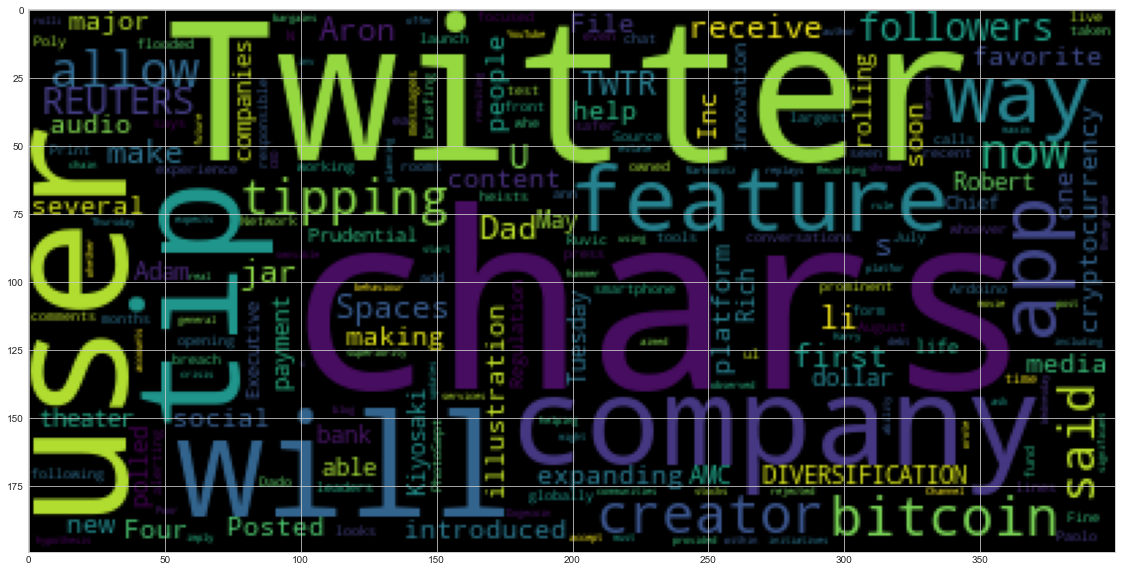

In [120]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(btc_news_articles))
plt.imshow(wc)

In [81]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(entities))
plt.imshow(wc)

NameError: name 'entities' is not defined

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [112]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [121]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [124]:
# Concatenate all of the Bitcoin text together
all_articles_joined = ' '.join(btc_news_articles)

In [126]:
# Run the NER processor on all of the text
doc = nlp(all_articles_joined)
doc

# Add a title to the document
# YOUR CODE HERE!

Four months after Twitter first introduced in-app tipping, the company is expanding its tip jar feature in a major way. The company is opening up tipping to all its users globally, and for the first … [+2390 chars] Posted 
Twitter will now allow people to tip their favorite content creators with bitcoin and it will test new ways to help users have a safer experience on the social media app, the company said on… [+44 chars] Twitter will soon make Spaces even more prominent in its app as it looks to add more creator-focused tools to the live audio feature. The company says its working on making conversations in Spaces ea… [+1856 chars] The Fine Print: The following comments are owned by whoever posted them. We are not responsible for them in any way. The Twitter app is seen on a smartphone in this illustration taken July 13, 2021. REUTERS/Dado Ruvic/Illustration/File PhotoSept 23 (Reuters) - Twitter Inc (TWTR.N) will now allow people to tip their… [+1354 chars] Twitter will now allow con

In [127]:
# Render the visualization
displacy.render(doc, style='ent')

In [30]:
# List all Entities
doc

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---